In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

In [15]:
data = pd.read_csv('data/complete_odi_data.csv', index_col=0)

In [16]:
data

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Ave_Bowl,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi
0,SR Tendulkar (INDIA),1989-2012,439,36,17908,200,44.77,20772,86.21,48,...,43.98,5.09,51.8,4,2,134,134,0,0,134
1,KC Sangakkara (Asia/ICC/SL),2000-2015,386,39,13942,169,42.12,17618,79.13,25,...,0.00,0.00,0.0,0,0,494,395,99,376,19
2,RT Ponting (AUS/ICC),1995-2012,363,38,13470,164,42.49,16727,80.52,30,...,34.66,4.16,50.0,0,0,157,157,0,0,157
3,ST Jayasuriya (Asia/SL),1989-2011,429,15,12987,189,31.83,14252,91.12,27,...,36.51,4.78,45.8,8,4,122,122,0,0,122
4,DPMD Jayawardene (Asia/SL),1998-2015,430,36,12429,144,33.50,15719,79.06,19,...,70.37,5.69,74.1,0,0,215,215,0,0,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,BB Sran (INDIA),2016-2016,6,0,0,0,0.00,0,0.00,0,...,38.42,5.34,43.1,0,0,1,1,0,0,1
2689,LW Stott (NZ),1979-1979,1,0,0,0,0.00,0,0.00,0,...,16.00,4.00,24.0,0,0,1,1,0,0,1
2690,EP Thompson (NZ),2009-2009,1,0,0,0,0.00,0,0.00,0,...,0.00,10.50,0.0,0,0,0,0,0,0,0
2691,AL Thomson (AUS),1971-1971,1,0,0,0,0.00,0,0.00,0,...,22.00,2.06,64.0,0,0,0,0,0,0,0


In [17]:
d = data[data['Player'].str.contains('IND')]
d = d[d['Runs'] > 0]
d = d[d['Span'].str.contains('202')]
d

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Ave_Bowl,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi
5,V Kohli (INDIA),2008-2022,249,37,12195,183,58.62,13084,93.20,43,...,160.75,6.19,155.7,0,0,134,134,0,0,134
17,RG Sharma (INDIA),2007-2021,220,30,9167,264,49.28,10295,89.04,29,...,64.37,5.21,74.1,0,0,76,76,0,0,76
56,S Dhawan (INDIA),2010-2022,143,7,6165,143,45.66,6587,93.59,17,...,0.00,0.00,0.0,0,0,70,70,0,0,70
193,RA Jadeja (INDIA),2009-2020,163,39,2411,87,32.58,2769,87.07,0,...,37.05,4.91,45.2,7,1,60,60,0,0,60
276,KL Rahul (INDIA),2016-2022,41,6,1585,112,46.61,1796,88.25,5,...,0.00,0.00,0.0,0,0,25,23,2,13,10
305,KM Jadhav (INDIA),2014-2020,71,19,1389,120,42.09,1367,101.60,2,...,37.77,5.15,43.9,0,0,33,33,0,0,33
332,HH Pandya (INDIA),2016-2021,62,7,1286,92,32.97,1100,116.90,0,...,41.47,5.60,44.3,0,0,24,24,0,0,24
441,SS Iyer (INDIA),2017-2022,24,1,867,103,39.40,875,99.08,1,...,0.00,7.16,0.0,0,0,9,9,0,0,9
511,R Ashwin (INDIA),2010-2022,109,20,707,65,16.83,812,87.06,0,...,33.14,4.91,40.4,1,0,30,30,0,0,30
541,RR Pant (INDIA),2018-2022,20,0,630,85,33.15,557,113.10,0,...,0.00,0.00,0.0,0,0,12,11,1,7,4


In [25]:
d = d[['Player', 'Runs']]
d1 = d.iloc[:9, :]
d2 = d.iloc[9:, :]
d1.loc[len(d1.index)] = ['Others', d2.sum()[1]]
d1['Player'] = d1['Player'].str.replace('\(INDIA\)', '')
d1

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Player,Runs
5,V Kohli,12195
17,RG Sharma,9167
56,S Dhawan,6165
193,RA Jadeja,2411
276,KL Rahul,1585
305,KM Jadhav,1389
332,HH Pandya,1286
441,SS Iyer,867
511,R Ashwin,707
9,Others,3346


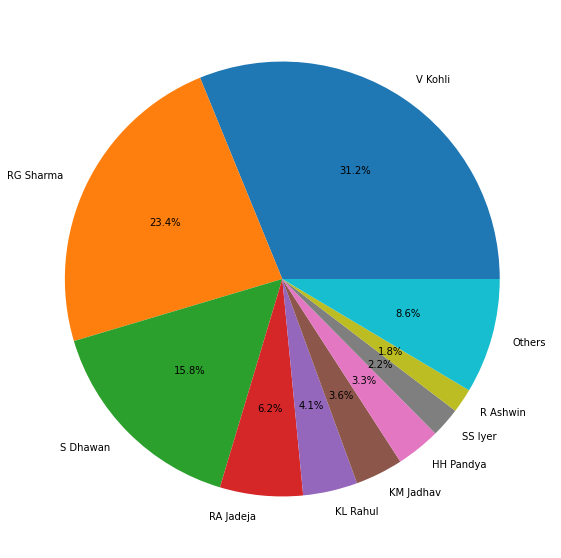

In [26]:
plt.figure(figsize=(10, 10))
plt.pie(d1['Runs'], labels=d1['Player'], autopct='%1.1f%%')
plt.show()

In [19]:
d = data[(data['Ave_Bat']>50) & (data['Mat']>100)]
d

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Ave_Bowl,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi
5,V Kohli (INDIA),2008-2022,249,37,12195,183,58.62,13084,93.20,43,...,160.75,6.19,155.7,0,0,134,134,0,0,134
9,MS Dhoni (Asia/INDIA),2004-2019,335,81,10583,183,50.15,12083,87.58,10,...,31.00,5.16,36.0,0,0,434,313,121,313,0
16,AB de Villiers (Afr/SA),2005-2018,221,38,9429,176,53.27,9317,101.20,24,...,28.85,6.31,27.4,0,0,180,175,5,93,82
27,HM Amla (SA),2008-2019,175,12,8079,159,50.18,9128,88.50,27,...,0.00,0.00,0.0,0,0,87,87,0,0,87
43,MG Bevan (AUS),1994-2004,229,67,6856,108,53.56,9264,74.00,6,...,45.97,5.05,54.6,0,0,69,69,0,0,69
58,JE Root (ENG),2013-2021,144,21,6061,133,51.36,6966,87.00,16,...,59.08,5.77,61.3,0,0,76,76,0,0,76


<AxesSubplot:xlabel='Player'>

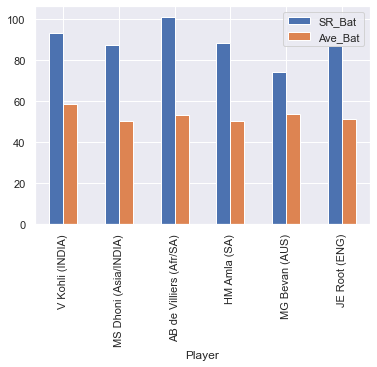

In [36]:
d.plot(x='Player', y=['SR_Bat', 'Ave_Bat'], kind='bar')

In [38]:
d = data[(data['SR_Bat']>100) & (data['Mat']>100)]
d

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Ave_Bowl,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi
16,AB de Villiers (Afr/SA),2005-2018,221,38,9429,176,53.27,9317,101.20,24,...,28.85,6.31,27.4,0,0,180,175,5,93,82
28,V Sehwag (Asia/ICC/INDIA),1999-2013,237,7,8074,219,35.41,7743,104.27,15,...,39.07,5.31,44.0,1,0,88,88,0,0,88
29,Shahid Afridi (Asia/ICC/PAK),1996-2015,389,26,8001,124,23.74,6824,117.24,6,...,34.66,4.63,44.9,4,9,126,126,0,0,126
113,JC Buttler (ENG),2012-2021,142,23,3872,150,38.72,3263,118.66,9,...,0.00,0.00,0.0,0,0,210,178,32,178,0
140,DA Miller (SA),2010-2022,134,35,3323,139,40.52,3298,100.75,5,...,0.00,0.00,0.0,0,0,62,62,0,0,62
150,GJ Maxwell (AUS),2012-2020,110,11,3109,108,33.43,2476,125.56,2,...,52.43,5.66,55.5,2,0,67,67,0,0,67
201,NLTC Perera (SL),2009-2021,157,16,2318,140,20.15,2070,111.98,1,...,32.78,5.82,33.7,5,4,61,61,0,0,61
243,MM Ali (ENG),2014-2021,108,14,1877,128,25.02,1853,101.29,3,...,50.85,5.25,58.1,1,0,36,36,0,0,36
527,AU Rashid (ENG),2009-2021,105,14,663,69,18.41,654,101.37,0,...,32.61,5.66,34.5,7,2,34,34,0,0,34


In [17]:
sns.set_theme(style="darkgrid")

Text(0, 0.5, 'Count')

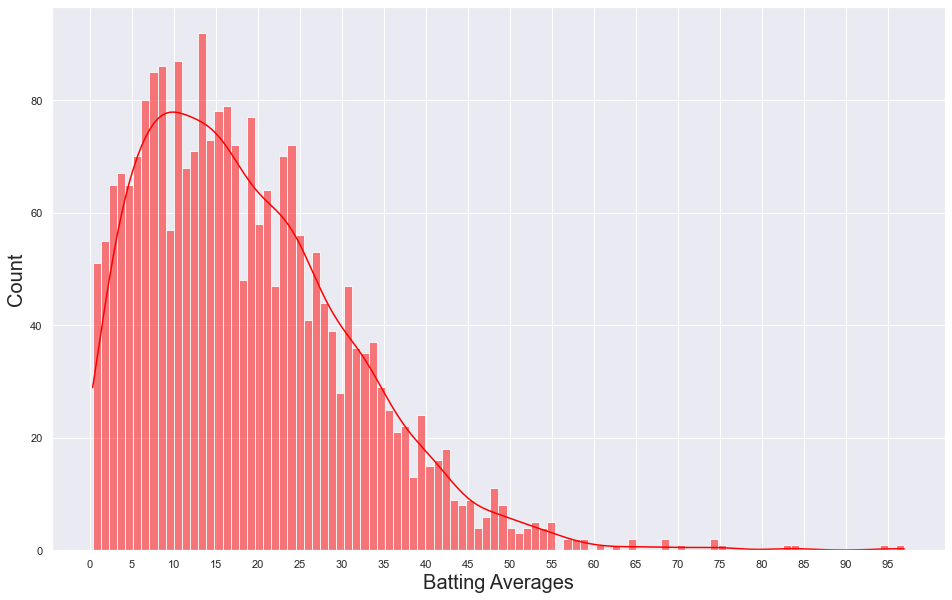

In [66]:
plt.figure(figsize=(16, 10))
d = data[data['Ave_Bat']>0.0]
ax = sns.histplot(d['Ave_Bat'], bins=100, color='red', element='bars', kde=True)
ax = plt.xticks([i for i in range(0, 100, 5)])
plt.xlabel('Batting Averages', fontsize=20)
plt.ylabel('Count', fontsize=20)

Text(0, 0.5, 'Count')

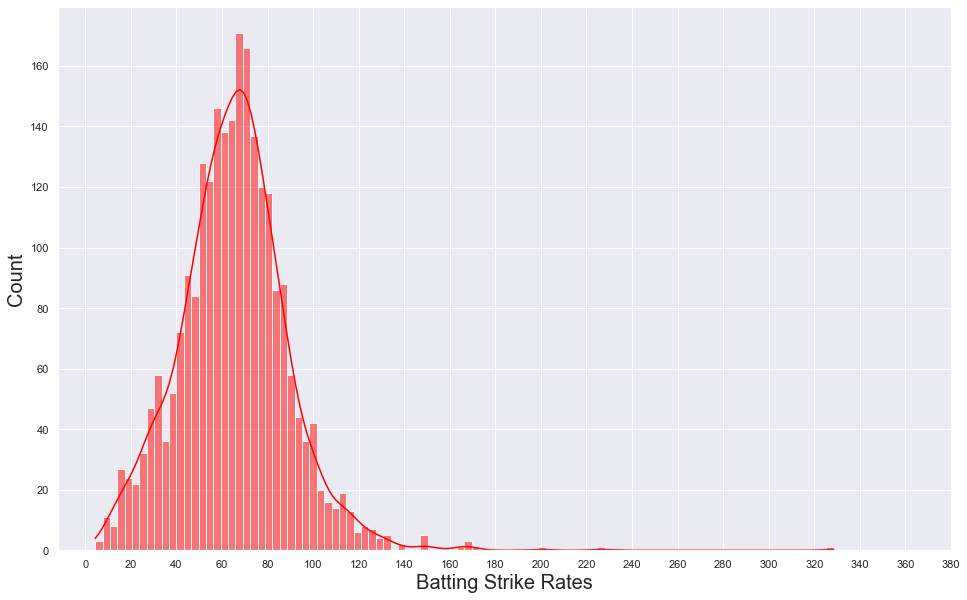

In [72]:
plt.figure(figsize=(16, 10))
d = data[data['Ave_Bat']>0.0]
ax = sns.histplot(d['SR_Bat'], bins=100, color='red', element='bars', kde=True)
ax = plt.xticks([i for i in range(0, 400, 20)])
plt.xlabel('Batting Strike Rates', fontsize=20)
plt.ylabel('Count', fontsize=20)

Text(0, 0.5, 'Count')

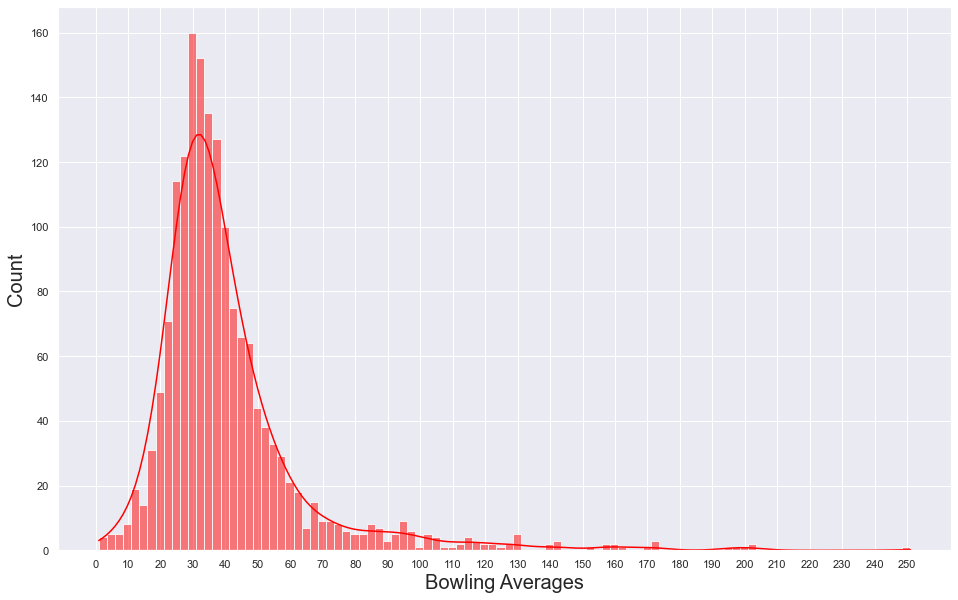

In [59]:
plt.figure(figsize=(16, 10))
d = data[data['Ave_Bowl']>0.0]
ax = sns.histplot(d['Ave_Bowl'], bins=100, color='red', element='bars', kde=True)
ax = plt.xticks([i for i in range(0, 260, 10)])
plt.xlabel('Bowling Averages', fontsize=20)
plt.ylabel('Count', fontsize=20)

Text(0, 0.5, 'Count')

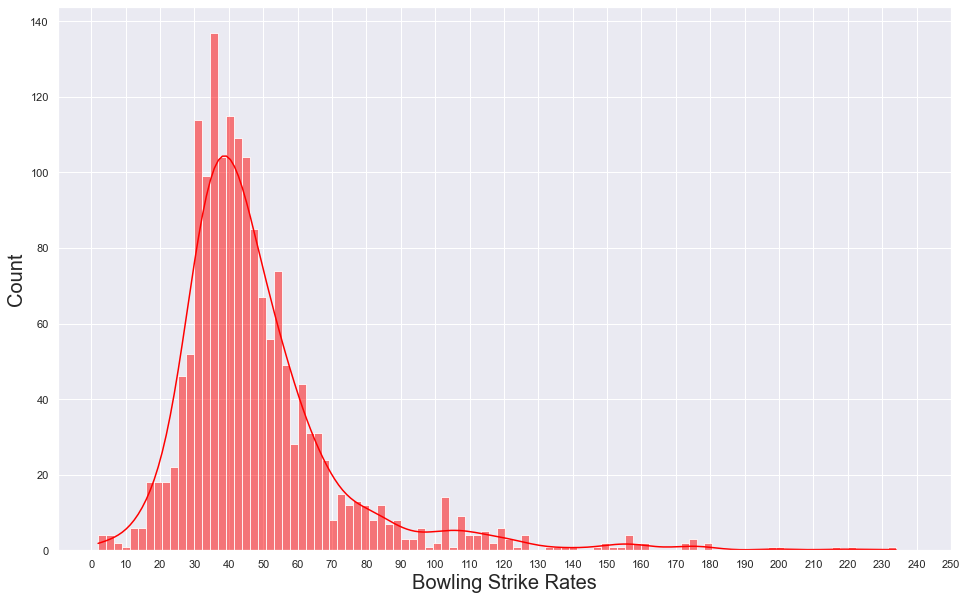

In [62]:
plt.figure(figsize=(16, 10))
d = data[data['SR_Bowl']>0.0]
ax = sns.histplot(d['SR_Bowl'], bins=100, color='red', element='bars', kde=True)
ax = plt.xticks([i for i in range(0, 260, 10)])
plt.xlabel('Bowling Strike Rates', fontsize=20)
plt.ylabel('Count', fontsize=20)